# Create Score Card - PD Model

### Import Libraires 

In [1]:
import numpy as np 
import pandas as pd
pd.options.display.max_rows = None
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Preparation

In [2]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership: RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:<38',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:>=57',
'mths_since_last_record:>=87']

In [3]:
#create a DF for ref_categories
df_ref_categories  = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0

#load summary_table
summary_table = pd.read_csv('summary_table.csv')

#combine summary_table and df_ref_categories
df_scorecard = pd.concat([summary_table,df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Unnamed: 0,Feature name,Coefficients
0,0,0.0,Intercept,-0.087338
1,1,1.0,grade:A,1.094858
2,2,2.0,grade:B,0.856751
3,3,3.0,grade:C,0.660675
4,4,4.0,grade:D,0.478009
5,5,5.0,grade:E,0.301263
6,6,6.0,grade:F,0.119657
7,7,7.0,home_ownership:OWN,0.075399
8,8,8.0,home_ownership:MORTGAGE,0.156742
9,9,9.0,addr_state:NM_VA,0.070009


# 2. Create Score Card

### (1) Decide boundaries: 
We set minimum_score = 300 and maximum_score = 850.

In [4]:
min_score = 300
max_score = 850

### (2) Determine range 
Sum lowest/highest coefficients accross original feature names to determine range

In [5]:
#find the lowest coefficients (i.e. highest probability of defaults)
df_scorecard['Original feature name']= df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -0.087338
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.510769
delinq_2yrs                    0.000000
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -1.104951
mths_since_last_delinq        -0.050739
mths_since_last_record        -0.388870
open_acc                       0.000000
pub_rec                        0.000000
purpose                        0.000000
term                           0.000000
total_acc                      0.000000
total_rev_hi_lim               0.000000
verification_status           -0.011580
Name: Coefficients, dtype: float64

In [6]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-2.1542484012154026

In [7]:
#maximum
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -0.087338
acc_now_delinq                 0.207320
addr_state                     0.542427
annual_inc                     0.843123
delinq_2yrs                    0.069978
dti                            0.436197
emp_length                     0.180558
grade                          1.094858
home_ownership                 0.156742
initial_list_status            0.053006
inq_last_6mths                 0.668733
int_rate                       0.888530
mths_since_earliest_cr_line    0.167236
mths_since_issue_d             0.000000
mths_since_last_delinq         0.094725
mths_since_last_record         0.180044
open_acc                       0.188685
pub_rec                        0.209027
purpose                        0.282169
term                           0.054580
total_acc                      0.119444
total_rev_hi_lim               0.436742
verification_status            0.058720
Name: Coefficients, dtype: float64

In [8]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

6.845504641545339

### (3) Convert coeff into scores:     
$ variable\_score = variable\_coef \frac{(max\_score-min\_score)}{(max\_sum\_coeff-min\_sum\_coeff)}$

In [9]:
df_scorecard['Score-Calc'] = df_scorecard['Coefficients']*(max_score-min_score)/(max_sum_coef-min_sum_coef)
#deal with intercept
df_scorecard['Score-Calc'][0] = (df_scorecard['Coefficients'][0]-min_sum_coef)/(max_sum_coef - min_sum_coef)* (max_score -min_score)+ min_score
df_scorecard

<ipython-input-9-e5577c75a5ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score-Calc'][0] = (df_scorecard['Coefficients'][0]-min_sum_coef)/(max_sum_coef - min_sum_coef)* (max_score -min_score)+ min_score


,index,Unnamed: 0,Feature name,Coefficients,Original feature name,Score-Calc
0,0,0.0,Intercept,-0.087338,Intercept,426.314633
1,1,1.0,grade:A,1.094858,grade,66.909828
2,2,2.0,grade:B,0.856751,grade,52.358414
3,3,3.0,grade:C,0.660675,grade,40.375709
4,4,4.0,grade:D,0.478009,grade,29.212450
5,5,5.0,grade:E,0.301263,grade,18.411049
6,6,6.0,grade:F,0.119657,grade,7.312543
7,7,7.0,home_ownership:OWN,0.075399,home_ownership,4.607872
8,8,8.0,home_ownership:MORTGAGE,0.156742,home_ownership,9.578948
9,9,9.0,addr_state:NM_VA,0.070009,addr_state,4.278436


In [10]:
#convert scores to integers
df_scorecard['Score-Preliminary'] = df_scorecard['Score-Calc'].round()
#check if min and max scores are as expected 
min_score_calc = df_scorecard.groupby('Original feature name')['Score-Preliminary'].min().sum()
max_score_calc = df_scorecard.groupby('Original feature name')['Score-Preliminary'].max().sum()
print('min_score_calc is ', min_score_calc,
     '\nmax_score_calc is ', max_score_calc)

min_score_calc is  299.0 
max_score_calc is  851.0


In [13]:
#round up
df_scorecard.iat[40,6] = -67.0
df_scorecard.iat[56,6] = 11.0
#check if min and max scores are as expected 
min_score_calc = df_scorecard.groupby('Original feature name')['Score-Preliminary'].min().sum()
max_score_calc = df_scorecard.groupby('Original feature name')['Score-Preliminary'].max().sum()
print('min_score_calc is ', min_score_calc,
     '\nmax_score_calc is ', max_score_calc)

min_score_calc is  300.0 
max_score_calc is  850.0


# 3. Calculate Credit Score

In [14]:
#array containing all dummie variables
dummies = ['grade:A','grade:B','grade:C','grade:D','grade:E','grade:F','grade:G',
'home_ownership: RENT_OTHER_NONE_ANY','home_ownership:OWN','home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified','verification_status:Source Verified','verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f','initial_list_status:w',
'term:36','term:60',
'emp_length:0','emp_length:1','emp_length:2-4','emp_length:5-6','emp_length:7-9','emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548','int_rate:9.548-12.025','int_rate:12.025-15.74','int_rate:15.74-20.281','int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0','delinq_2yrs:1-3','delinq_2yrs:>=4',
'inq_last_6mths:0','inq_last_6mths:1-2','inq_last_6mths:3-6','inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2','pub_rec:3-4','pub_rec:>=5',
'total_acc:<=27','total_acc:28-51','total_acc:>=52',
'acc_now_delinq:0','acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=87',
]



In [15]:
#load test data
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)
#select all dummies
inputs_test_with_ref_w_intercept = loan_data_inputs_test.loc[:,dummies]
#add intercept
inputs_test_with_ref_w_intercept.insert(0,'Intercept',1)
#drop reference columns
inputs_test_with_ref_w_intercept = inputs_test_with_ref_w_intercept[df_scorecard['Feature name'].values]
inputs_test_with_ref_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,pub_rec:3-4,pub_rec:>=5,total_acc:28-51,total_acc:>=52,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,grade:G,home_ownership: RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:<38,int_rate:>20.281,mths_since_earliest_cr_line:<140,delinq_2yrs:>=4,inq_last_6mths:>6,open_acc:0,pub_rec:0-2,total_acc:<=27,acc_now_delinq:0,total_rev_hi_lim:<=5K,annual_inc:<20K,dti:>35,mths_since_last_delinq:>=57,mths_since_last_record:>=87
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0


In [14]:
df_scorecard['Final'] = df_scorecard['Score-Preliminary']
scorecard_scores = df_scorecard['Final']
scorecard_scores = scorecard_scores.values.reshape(len(scorecard_scores),1)

y_scores = inputs_test_with_ref_w_intercept.dot(scorecard_scores)
y_scores.columns = ['Scores']
y_scores.head()

KeyError: 'Final'

# 4. From Credit Score to PD

$sum\_coef\_score = \frac{total\_score - min\_score}{max\_score - min\_score}(max\_sum\_coef - min\_sum\_coef) + min\_sum\_coef$

In [ ]:
sum_coef_from_score = ((y_scores-min_score)/(max_score-min_score))*(max_sum_coef-min_sum_coef) + min_sum_coef
y_hat_proba_from_score = np.exp(sum_coef_from_score)/(np.exp(sum_coef_from_score)+1)
y_hat_proba_from_score.columns = ['y_hat_testProba']
y_hat_proba_from_score.head()

Recall in 3_PD_model.ipynb we calculated y_hat_testProba.    
The values are not exactly the same due to the rounding process

In [ ]:
df_testProba = pd.read_csv('example/test_predicted_proba.csv')
df_testProba.head()

# 5. Set Cut-Offs
    * Once the cut-off is chosen, it pre-determines the proportion of borrowers that will be approved and rejects   
    * It impact the quality of loans
    * In this example we use ROC curve to determine cut-offs

In [21]:
#load ROC data (produced in 4_PD_Model.ipynb)
df_cutoffs = pd.read_csv('example/roc_data.csv')
fpr = df_cutoffs['fpr'].values
tpr = df_cutoffs['tpr'].values

Text(0.5, 1.0, 'ROC curve')

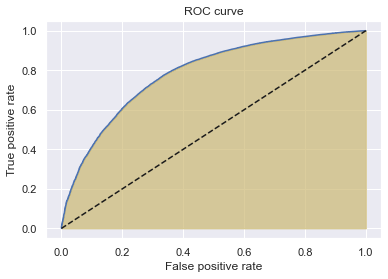

In [22]:
#Plot ROC curve
sns.set()
plt.plot(fpr,tpr)
plt.fill_between(fpr, tpr, alpha = 0.7, color = 'y')

plt.plot(fpr,fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [23]:
df_cutoffs.head()

,Unnamed: 0,fpr,tpr,thresholds
0,0,0.000000,0.000000,1.996504
1,1,0.000000,0.000012,0.996504
2,2,0.000000,0.005405,0.992004
3,3,0.000098,0.005405,0.991999
4,4,0.000098,0.005839,0.991919


Then we use thresholds (probability of non-default) to calculate score: 

$ score\_from\_prob = (\ln\frac{ prob\_non\_default }{ prob\_default }-min\_sum\_coef)\frac{max\_score - min\_score}{max\_sum\_coef - min\_sum\_coef} + min\_score $

In [24]:
df_cutoffs['Score'] = (np.log(df_cutoffs['thresholds']/(1-df_cutoffs['thresholds'])) - min_sum_coef)*(max_score-min_score)/(max_sum_coef-min_sum_coef)+ min_score
df_cutoffs.at[0,'Score'] = max_score
df_cutoffs.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Unnamed: 0,fpr,tpr,thresholds,Score
0,0,0.000000,0.000000,1.996504,850.000000
1,1,0.000000,0.000012,0.996504,718.583803
2,2,0.000000,0.005405,0.992004,681.989551
3,3,0.000098,0.005405,0.991999,681.962511
4,4,0.000098,0.005839,0.991919,681.522747


## Calculate Aproval rate and rejection rate

In [25]:
def n_approved(p):
    return np.where(df_testProba['y_hat_testProba']>=p,1,0).sum()

df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_testProba['y_hat_testProba'].shape[0]-df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved']/ df_testProba['y_hat_testProba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [26]:
df_cutoffs.head(20)

,Unnamed: 0,fpr,tpr,thresholds,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,0,0.000000,0.000000,1.996504,850.000000,0,93257,0.000000,1.000000
1,1,0.000000,0.000012,0.996504,718.583803,1,93256,0.000011,0.999989
2,2,0.000000,0.005405,0.992004,681.989551,449,92808,0.004815,0.995185
3,3,0.000098,0.005405,0.991999,681.962511,450,92807,0.004825,0.995175
4,4,0.000098,0.005839,0.991919,681.522747,486,92771,0.005211,0.994789
5,5,0.000196,0.005839,0.991905,681.448537,487,92770,0.005222,0.994778
6,6,0.000196,0.009053,0.991289,678.190853,754,92503,0.008085,0.991915
7,7,0.000294,0.009053,0.991287,678.183939,755,92502,0.008096,0.991904
8,8,0.000294,0.011160,0.990976,676.625174,930,92327,0.009972,0.990028
9,9,0.000393,0.011160,0.990973,676.611288,931,92326,0.009983,0.990017


# 6. Save scorecard

In [111]:
df_scorecard.to_csv('daf_scorecard.csv')